In [3]:
%matplotlib inline

In [16]:
### Import Packages

import matplotlib.pyplot as plt
import numpy as np
import starry
import pandas as pd
from glob import glob
import os
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts

###### Rotation Period: 5 Hours
###### Inclination Angle: 90 Degrees

In [17]:
#### Read in light curves, set an error:
r5_0degree = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")

## Rotation period 5 hours 0 degrees (equator on)
r5_0degree_flux = r5_0degree[1]
r5_0degree_flux = r5_0degree_flux/np.median(r5_0degree_flux)
time_r5_0degree =  r5_0degree[0]
sigma=0.001

In [27]:
### Map function

def SurfaceMap(flux,ydeg,time,rotation_period,inc_angle):
    ### Plotting
    fig, ax = plt.subplots(1, figsize=(12, 4))
    plt.plot(time, flux)
    ax.set_xlabel("Time (hr)", fontsize=18)
    ax.set_ylabel("Normalized flux", fontsize=18)
    plt.savefig("RotationSplit_r5_0degree/r"+str(rotation_period)+"_d"+str(inc_angle)+"_"+str(time[0])+"LightCurve.jpg")
    ## now the fun part! 
    ## instantiate a map so we can do inference on this dataset
    map = starry.Map(ydeg=ydeg, reflected=False)
    map.obl = 0
    map.inc = inc_angle
    map.set_data(flux, C=0.001 ** 2)
    mu = np.empty(map.Ny)
    mu[0] = 1
    mu[1:] = 0
    L = np.empty(map.Ny)
    L[0] = 1e0
    L[1:] = 1e-5
    map.set_prior(L=L)
    nrot=max(time)/rotation_period
    npts = len(time)
    theta = np.linspace(0, 360 * nrot, npts)
    kwargs = dict(theta=theta)
    mu, cho_cov = map.solve(**kwargs)
    map.show(colorbar=True, projection="moll",dpi=500,file="RotationSplit_r5_0degree/r"+str(rotation_period)+"_d"+str(inc_angle)+"_"+str(time[0])+".jpg")


In [19]:
### Create an array to index with

IndexArray = np.arange(0,401,20)

In [21]:
time_r5_0degree

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,  11.5 ,  11.75,
        12.  ,  12.25,  12.5 ,  12.75,  13.  ,  13.25,  13.5 ,  13.75,
        14.  ,  14.25,  14.5 ,  14.75,  15.  ,  15.25,  15.5 ,  15.75,
        16.  ,  16.25,  16.5 ,  16.75,  17.  ,  17.25,  17.5 ,  17.75,
        18.  ,  18.25,  18.5 ,  18.75,  19.  ,  19.25,  19.5 ,  19.75,
        20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75,
        26.  ,  26.25,  26.5 ,  26.75,  27.  ,  27.25,  27.5 ,  27.75,
      

Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
Pre-computing some matrices... Done.
Compiling `render`... Done.
/op

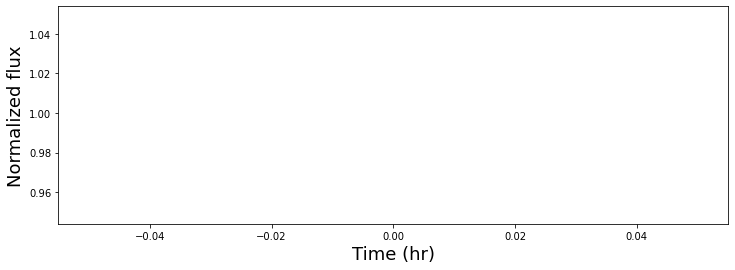

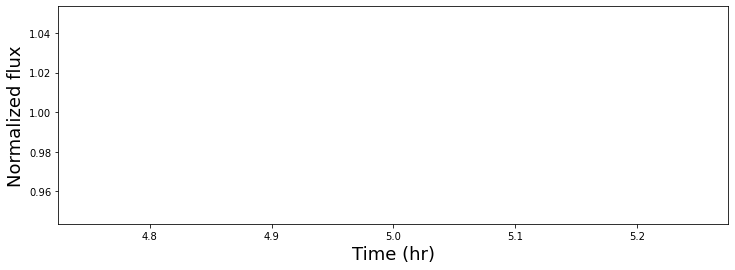

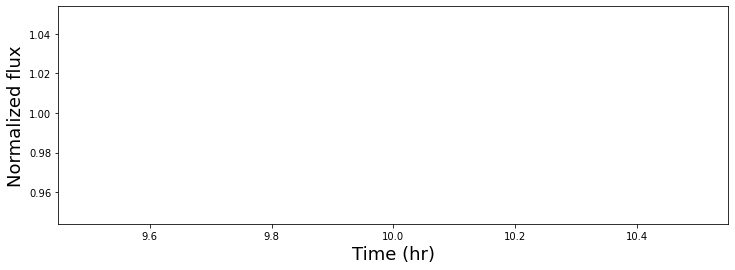

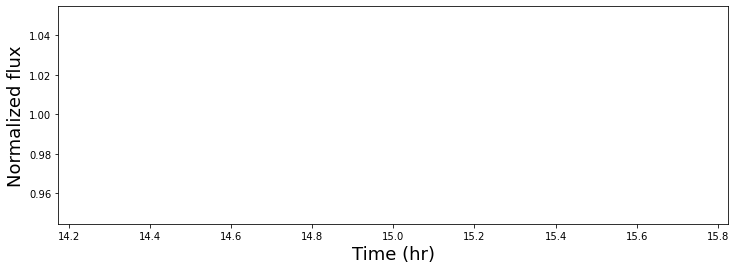

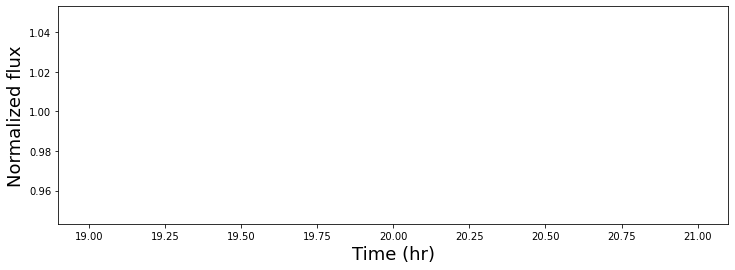

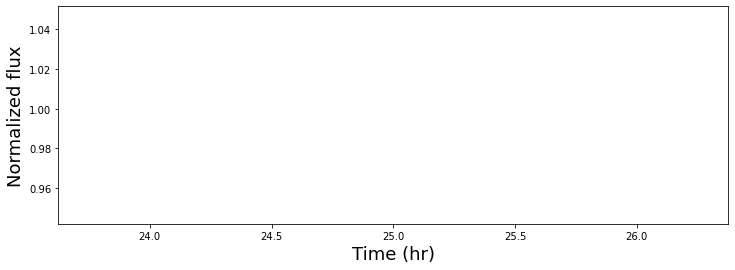

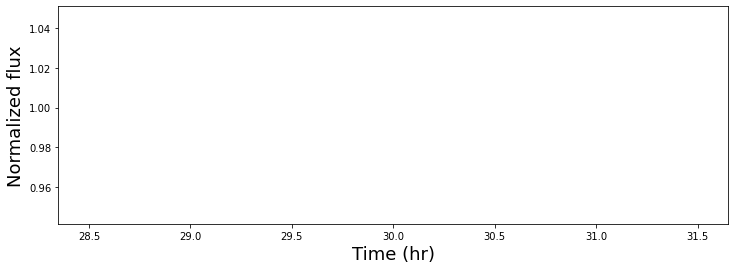

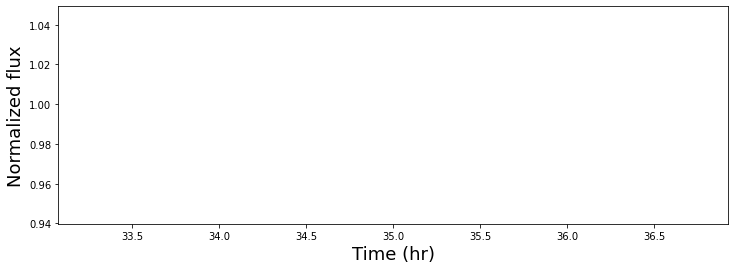

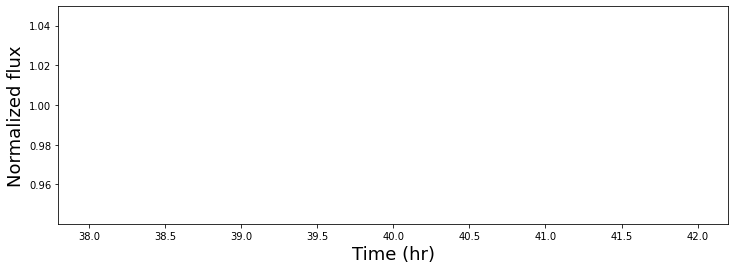

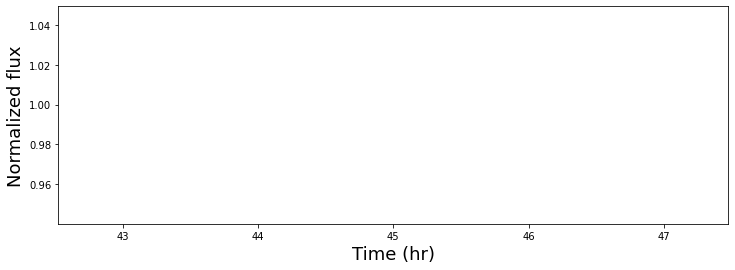

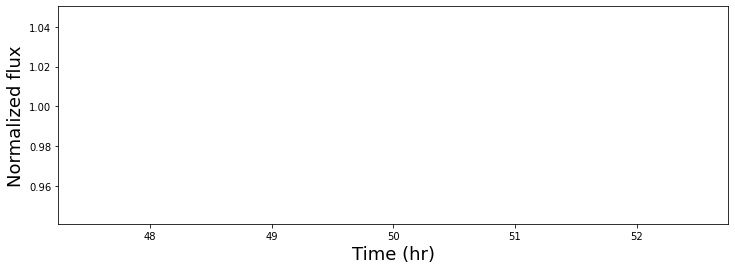

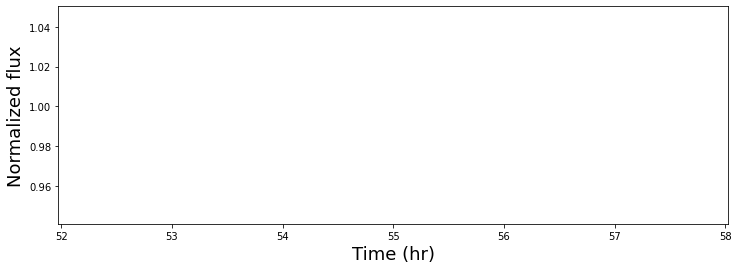

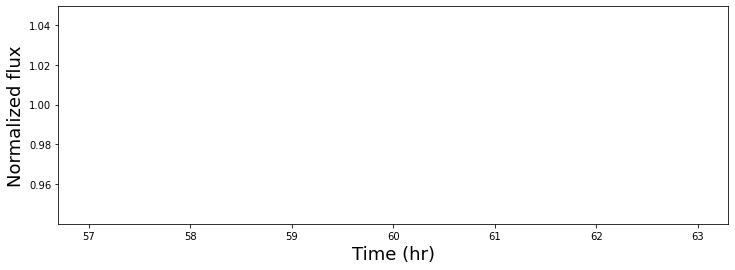

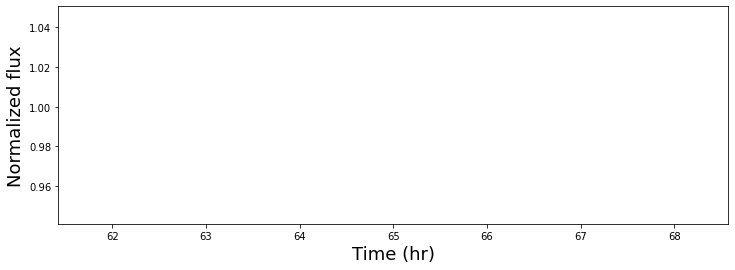

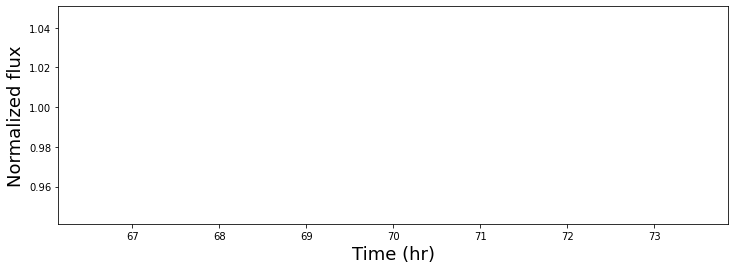

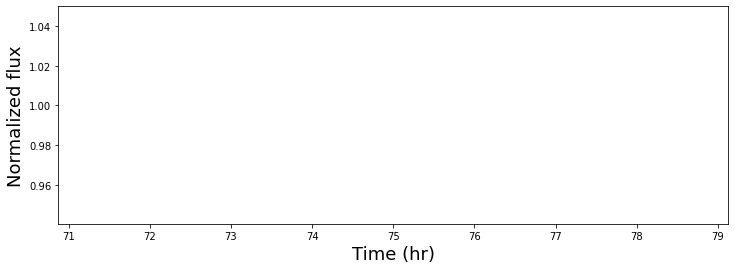

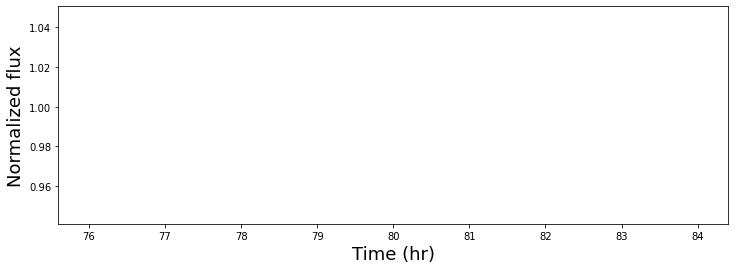

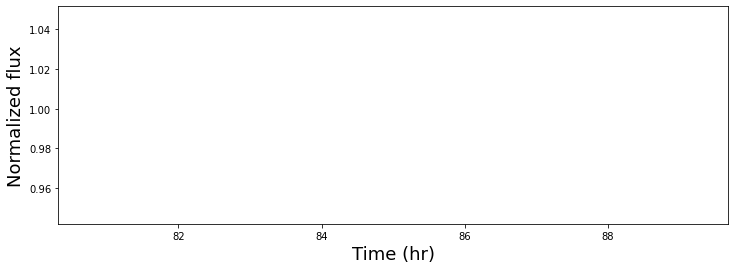

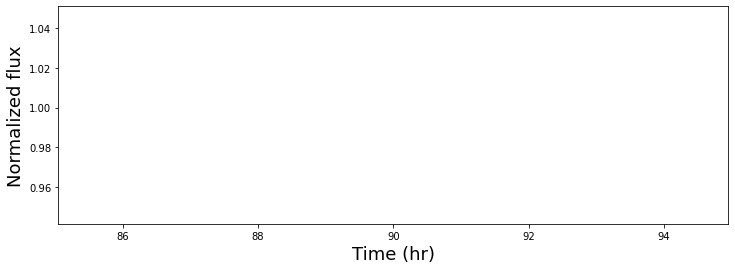

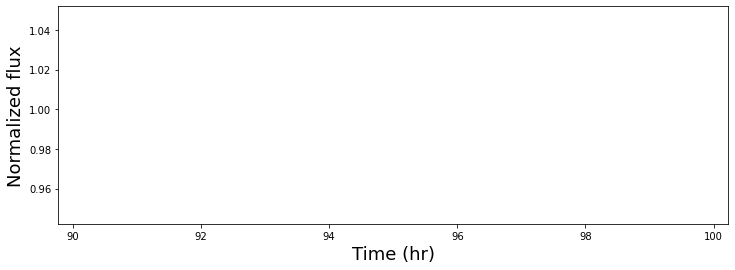

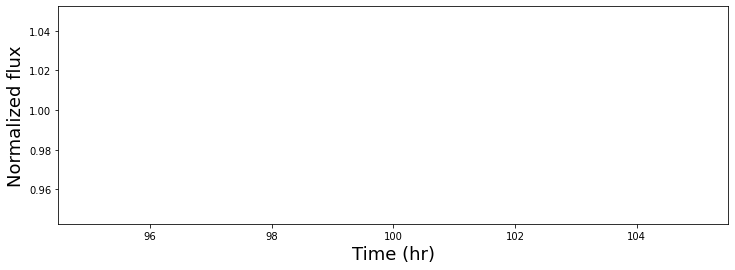

In [28]:
### Create a loop to save multiple maps

for i in IndexArray:
    SurfaceMap(r5_0degree_flux[i:i+1],5,time_r5_0degree[i:i+1],5,90)

In [23]:
print(r5_0degree_flux[0:20])

[0.99894448 0.99746675 0.99683344 0.99810006 1.00105552 1.00548871
 1.00928858 1.01266624 1.01435508 1.01329956 1.00844416 1.00211104
 0.99620013 0.99197805 0.99050032 0.99113363 0.99282246 0.99556681
 0.99831117 0.99936669]


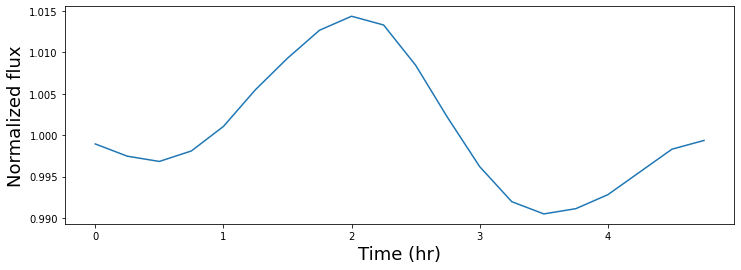

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 4))
plt.plot(time_r5_0degree[0:20], r5_0degree_flux[0:20])
ax.set_xlabel("Time (hr)", fontsize=18)
ax.set_ylabel("Normalized flux", fontsize=18)
#plt.savefig("RotationSplit_r5_0degree/r"+str(rotation_period)+"_d"+str(inc_angle)+"_"+str(time[0])+"LightCurve.jpg")
plt.show()

Pre-computing some matrices... Done.
Compiling `render`... Done.
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)


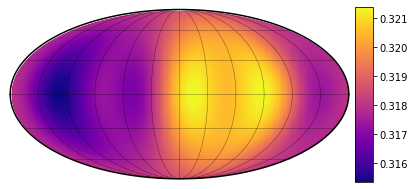

In [26]:
map = starry.Map(ydeg=5, reflected=False)
map.obl = 0
map.inc = 90
map.set_data(r5_0degree_flux[20:40], C=0.001 ** 2)
mu = np.empty(map.Ny)
mu[0] = 1
mu[1:] = 0
L = np.empty(map.Ny)
L[0] = 1e0
L[1:] = 1e-5
map.set_prior(L=L)
nrot=max(time_r5_0degree[20:40])/5
npts = len(time_r5_0degree[20:40])
theta = np.linspace(0, 360 * nrot, npts)
kwargs = dict(theta=theta)
mu, cho_cov = map.solve(**kwargs)
map.show(colorbar=True, projection="moll",dpi=500)